In [12]:
!pip3 install icecream;

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import icecream
from icecream import ic
# import Image from PIL
from PIL import Image

In [14]:
def generate_one_full_day(buoy_id, day_number, month_number, year_number):
    # concatenate one image for each hour of the day and save it as a new image called 'full_day.png'
    
    
    if type(buoy_id) != str:
        buoy_id = str(buoy_id)
    if type(day_number) != str:
        day_number = str(day_number)
    if type(month_number) != str:   
        month_number = str(month_number)
    if type(year_number) != str:    
        year_number = str(year_number)
    # get the images from the buoy_id folder and sort them
    buoy_path = '../images/buoys/' + buoy_id
    images = os.listdir(buoy_path)
    #ic()
    images.sort()

    # if full_day_day_month_year.png already exists, delete it and create a new one
    if os.path.exists(f'{buoy_path}/full_day_{day_number}_{month_number}_{year_number}.png'):
        os.remove(f'{buoy_path}/full_day_{day_number}_{month_number}_{year_number}.png')
    

    # the names of the images are in the format: '2019-01-01_00.png'
    # images/buoys/41004/2022_11_5_15_44.jpg
    # where the day is the 3rd element in the list
    # and the hour is the 4th element in the list
    # so we can use a list comprehension to get the images for each hour of the day if we sort the images first.
    # go through the folder and add the filenames to the list if the day is the same as the day_number
    # and the month is the same as the month_number
    # and the year is the same as the year_number
    print(f'found {len(images)} images')
    # drop .DS_Store from the list
    try:
        images = [image for image in images if image != '.DS_Store']
        
        #print(f' example: {images[0]}')
        # get the images for the day
        images_for_day = [image for image in images if image.split('_')[2] == str(day_number) and image.split('_')[1] == str(month_number) and image.split('_')[0] == str(year_number)]
        #ic()
        # get the images for the day and sort them
        images_for_day.sort()
        # get one image for each hour of the day
        images_for_day = [image for image in images_for_day if image.split('_')[3] == '00' or image.split('_')[3] == '01' or image.split('_')[3] == '02' or image.split('_')[3] == '03' or image.split('_')[3] == '04' or image.split('_')[3] == '05' or image.split('_')[3] == '06' or image.split('_')[3] == '07' or image.split('_')[3] == '08' or image.split('_')[3] == '09' or image.split('_')[3] == '10' or image.split('_')[3] == '11' or image.split('_')[3] == '12' or image.split('_')[3] == '13' or image.split('_')[3] == '14' or image.split('_')[3] == '15' or image.split('_')[3] == '16' or image.split('_')[3] == '17' or image.split('_')[3] == '18' or image.split('_')[3] == '19' or image.split('_')[3] == '20' or image.split('_')[3] == '21' or image.split('_')[3] == '22' or image.split('_')[3] == '23']
        # get the images for the day and sort them
        images_for_day.sort()
        #ic()
        # add the images one after the other by concatenating them vertically and save the result as a new image called 'full_day.png' in the buoy_id folder
        # get the first image
        first_image = images_for_day[0]
        #ic()
        # open the first image
        first_image = Image.open(buoy_path + '/' + first_image)
        # get the width and height of the first image
        
        # crop the bottom 20 pixels of the first image
        # first_image = first_image.crop((0, 0, first_image.width, first_image.height - 20))
        # get the width and height of the first image
        width, height = first_image.size
        #ic()
        # create a new image with the same width as the first image and the height of the first image multiplied by the number of images
        new_image = Image.new('RGB', (width, height*len(images_for_day)))
        # paste the first image in the new image
        new_image.paste(first_image, (0, 0))
        # go through the rest of the images and add them to the bottom of the new image one after the other
        if len(images_for_day) < 12:
            print('Fewer than 12 images for the day')
        for i in range(1, len(images_for_day)):
            #ic()
            # get the image
            image = images_for_day[i]
            # open the image
            image = Image.open(buoy_path + '/' + image)
            # crop the bottom 20 pixels of the image
            # image = image.crop((0, 0, image.width, image.height - 20))
            # paste the image in the new image
            new_image.paste(image, (0, height*i))
        # save the new image
        new_image.save(f'{buoy_path}/full_day_{day_number}_{month_number}_{year_number}.png')
        print(f'full_day_{day_number}_{month_number}_{year_number}.png saved')
        return new_image # return the new image
    except Exception as e:
        print('error in generate_one_full_day ' + str(e))
        pass

In [15]:
# Test the function
full_day_image = generate_one_full_day(51002, 6, 11, 2022)


found 161 images
full_day_6_11_2022.png saved


In [16]:
activated = False

# get the list of buoy ids from the folders in the images/buoys folder
buoy_ids = os.listdir('../images/buoys')
# drop .DS_Store from the list
buoy_ids = [buoy_id for buoy_id in buoy_ids if buoy_id != '.DS_Store']

# create full day images for each buoy for each day in the dataset and save them in the /images/full_days folder as full_day_day_month_year_buoy_id.png
counter = 0
while counter < 400:
    if not activated:
        break
    for buoy_id in buoy_ids:
        # get the list of images for the buoy
        buoy_path = '../images/buoys/' + buoy_id
        images = os.listdir(buoy_path + '/') # get the list of images for the buoy from the buoy folder
        # drop .DS_Store from the list
        images = [image for image in images if image != '.DS_Store']
        # get the list of dates for the buoy
        try:
            dates = [image.split('_')[0] + '_' + image.split('_')[1] + '_' + image.split('_')[2] for image in images]
            # drop duplicates from the list
            dates = list(dict.fromkeys(dates))
            # sort the list
            dates.sort()
            # go through the list of dates and create a full day image for each date
        except Exception as e:
            print('error in creating full day images ' + str(e))
            pass
        for date in dates:
            try:
                # get the day, month and year from the date
                # if the picture does not exist yet then create it
                
                day = int(date.split('_')[2])
                month = int(date.split('_')[1])
                year = int(date.split('_')[0])
                if os.path.exists(f'../images/full_days/{day}_{month}_{year}_{buoy_id}.png'):
                    continue # if the picture already exists then skip it
                # create a full day image for the buoy for the day, month and year
                full_day_image = generate_one_full_day(buoy_id, day, month, year)
                # save the full day image in the full_days folder
                full_day_image.save(f'../images/full_days/{day}_{month}_{year}_{buoy_id}.png')
                print(f'{day}_{month}_{year}_{buoy_id}.png saved')
                # show a preview of the full day image
                # display(full_day_image)
            except Exception as e:
                print('error in creating full day images ' + str(e))
                pass
    counter += 1

In [17]:
def calculate_brightness(image):
    greyscale_image = image.convert('L') # convert the image to greyscale to make the calculation easier
    histogram = greyscale_image.histogram() # get the histogram of the greyscale image
    pixels = sum(histogram) # get the total number of pixels
    brightness = scale = len(histogram)
    # go through the histogram and calculate the brightness
    for index in range(0, scale):
        ratio = histogram[index] / pixels
        brightness += ratio * (-scale + index)

    return 1 if brightness == 255 else brightness / scale

So, if we were to go through each set of panels and use the `calculate_brightness` function to calculate the brightness of each panel, we could take the median brightness of the panel set and then adjust each panel image's pixels to be the same brightness as the median brightness of the panel set. (while keeping the relative pixel to pixel brightness the same within each panel image). This would allow us to stitch the images together and have them all be the same brightness. This would be a great way to create a tapestry of the ocean's life. I think that this would be a beautiful piece of art. I will begin the tapestry at the end of this readme.

In [89]:
panel_verbose_flag = False
from PIL import Image, ImageDraw, ImageFont
#import ImageEnhance
from PIL import ImageEnhance
import numpy as np

def panel_normalizer_contrast(panel_path):
    """
    panel_normalizer_contrast takes a panel path and normalizes the images in the panel folder by making them all have contrast values that are the median of the contrast values within the panel folder. Using ImageEnhance.Contrast to adjust the contrast of the images.

    Parameters

    :param panel_path: the path to the panel folder that contains the images to be normalized
    :type panel_path: str
    """
    # get the list of images in the panel folder
    images = os.listdir(panel_path + '/') # get the list of images for the buoy from the buoy folder
    # drop .DS_Store from the list
    images = [image for image in images if image != '.DS_Store']
    # if there are images that begin with 'norm_' then delete them
    for image in images:
        if image.startswith('norm_'):
            os.remove(panel_path + '/' + image)
    # get the list of images in the panel folder again
    images = os.listdir(panel_path + '/') # get the list of images for the buoy from the buoy folder
    # drop .DS_Store from the list
    images = [image for image in images if image != '.DS_Store']

    # get the list of contrast values for the images in the panel folder
    contrast_values = {}
    # save the contrast values in a dictionary with the image name as the key and the contrast value as the value
    


    #Graham: Hey Copilot, Why am I seeing "error in panel_normalizer only size-1 arrays can be converted to Python scalars" this error?
    #Copilot: Graham, I think you are trying to convert a numpy array to a python scalar. You can use the .item() method to convert a numpy array to a python scalar.
    #Graham: Thanks Copilot, can you give me an example of what that mistake looks like?
    #Copilot: Graham, here is an example of what that mistake looks like: contrast_value = ImageEnhance.Contrast(image).enhance(0).getextrema()[0]
    #Graham: Thanks Copilot, I'll try that out.






def panel_normalizer(panel_path):
    # get the list of images for the panel
    """
    panel_normalizer takes a panel path and normalizes the images in the panel folder by making them all have brightness values that are the median of the brightness values within the panel folder.

    Parameters

    :param panel_path: the path to the panel folder that contains the images to be normalized
    :type panel_path: str
    """
    try:
        images = os.listdir(panel_path + '/') # get the list of images for the panel from the panel folder
        # drop .DS_Store from the list
        images = [image for image in images if image != '.DS_Store']
        # get the list of brightness values for the images in the panel
        brightness_values = [calculate_brightness(Image.open(panel_path + '/' + image)) for image in images]
        # get the median brightness value of the images in the panel
        median_brightness_value = np.median(brightness_values)
        # go through the images in the panel and normalize the brightness of the images
        for image in images:
            image_name = str(image)
            # open the image
            image = Image.open(panel_path + '/' + image_name)
            # convert a copy of the image to greyscale
            image_temp = image.convert('L')
            # get the brightness value of the image
            brightness_value = calculate_brightness(image_temp)
            # calculate the brightness factor
            brightness_factor = median_brightness_value / brightness_value
            # calculate the contrast factor
            contrast_factor = 1 / brightness_factor
            # create a brightness and contrast enhancer
            enhancer = ImageEnhance.Brightness(image)
            # enhance the brightness of the image
            image = enhancer.enhance(brightness_factor)
            # create a brightness and contrast enhancer
            enhancer = ImageEnhance.Contrast(image)
            # enhance the contrast of the image
            image = enhancer.enhance(contrast_factor)
            # save the image
            image.save(panel_path + '/norm_' + image_name)
            if panel_verbose_flag:
                print(f'{image} normalized')
        try:
            panel_normalizer_contrast(panel_path) # normalize the contrast of the images in the panel
        except Exception as e:
            print('error in panel_normalizer_contrast ' + str(e))
            pass
    except Exception as e:
        print('error in panel_normalizer ' + str(e))
        pass
    
    

In [119]:
import json

def getbenchmark_image_values(benchmark_path):
    # read the contrast standard file and get the contrast standard
    # open the image
    benchmark_image = Image.open(benchmark_path)
    # get the contrast value of the image
    benchmark_contrast_value = ImageEnhance.Contrast(benchmark_image).enhance(0).getextrema()[0]
    # get the brightness value of the image by converting it to greyscale
    benchmark_brightness_value = calculate_brightness(benchmark_image.convert('L'))
    # close the image
    benchmark_image.close()

    # save the benchmark contrast value and benchmark brightness value to a dictionary
    benchmark_values = {'contrast':benchmark_contrast_value,'brightness':benchmark_brightness_value}
    # save to a json file
    with open('../images/benchmark_values.json','w') as f:
        json.dump(benchmark_values,f)



In [120]:
from PIL import ImageEnhance
# show them all on a horizontal matplotlib figure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json

getbenchmark_image_values('../images/contrast_standard.png')

# load benchmark values from json file
with open('../images/benchmark_values.json','r') as f:
    benchmark_values = json.load(f)

benchmark_contrast = benchmark_values['contrast'] # get the benchmark contrast value
benchmark_brightness = benchmark_values['brightness'] # get the benchmark brightness value

# get the list of panels
image = '../images/panels/51101/2022_11_7_20_9/panel_1.png'

# what type of image is it?
# for ImageEnhance.Brightness(image) the image must be a PIL Image object
# for ImageEnhance.Contrast(image) the image must be a PIL Image object

def enhancement_engine(image_path,enhancement_type='brightness',enhance_factor=4,verbose=False):
    """
    enhancement_engine takes an image path and enhances the image using the enhancement type and enhance factor. The enhancement type can be brightness or contrast. The enhance factor is a float that is used to enhance the image. The enhance factor is multiplied by the image to enhance the image. The enhance factor can be any float value. The enhance factor can be greater than 1 to enhance the image or less than 1 to reduce the image. The enhance factor can be 1 to leave the image unchanged.

    Parameters

    :param image_path: the path to the image to be enhanced
    :type image_path: str
    :param enhancement_type: the type of enhancement to be applied to the image, defaults to 'brightness'
    :type enhancement_type: str, optional
    :param enhance_factor: by how much to enhance the image, defaults to 4
    :type enhance_factor: int, optional
    :param verbose: whether to print the enhancement type and enhance factor and the images with matplotlib, defaults to False
    :type verbose: bool, optional
    """
    
    global benchmark_contrast, benchmark_brightness # get the benchmark contrast and benchmark brightness values
    
    assert(enhancement_type in ['brightness','contrast','enhance','color'], 'enhancement_type must be brightness, contrast, enhance, or color') # make sure the enhancement_type is valid

    
    

    base_path = str(image_path) # get the base path of the image
    image = Image.open(image_path)
    enhancer = ImageEnhance.Contrast(image)

    for i in range(1,enhance_factor):
        factor = i / (enhance_factor//2) # the factor to enhance the image by (must be a float) (0.0 to 1.0)
        image = enhancer.enhance(factor)
        # if the file does not exist then create it
        if not os.path.exists(image_path.replace('.png','_enhanced.png')):
            image.save(image_path.replace('.png','_enhanced.png'))
        else:
            print('file already exists')



    if verbose:
        images = [base_path,base_path.replace('.png','_enhanced.png')]
        fig=plt.figure(figsize=(8, 8))
        columns = 2
        rows = 1
        for i in range(1, columns*rows +1):
            img = mpimg.imread(images[i-1])
            fig.add_subplot(rows, columns, i)
            plt.imshow(img)
        plt.show()
        print(f'enhancement_type: {enhancement_type}')
        print(f'enhance_factor: {enhance_factor}')
    

    else:
        pass


<>:41: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:41: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_99665/419799937.py:41: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(enhancement_type in ['brightness','contrast','enhance','color'], 'enhancement_type must be brightness, contrast, enhance, or color') # make sure the enhancement_type is valid


In [135]:
def make_like_benchmark(image_path,benchmark_contrast, benchmark_brightness,verbose=False):
    # just look at the image and make it like the benchmark
    # open the image
    image = Image.open(image_path) # open the image, and create the working copy of the image
    # get the contrast value of the image
    contrast_value = ImageEnhance.Contrast(image).enhance(0).getextrema()[0] # get the contrast value of the image
    # convert the contrast value tuple to a list and get the first value
    contrast_value = list(contrast_value)[0] # convert the contrast value tuple to a list and get the first value
    if verbose: print(f'type for contrast_value: {type(contrast_value)}\n contrast_value: {contrast_value}')
    if verbose: print(f'type for benchmark_contrast: {type(benchmark_contrast)}\n benchmark_contrast: {benchmark_contrast}')
    if verbose: print(f'type for image: {type(image)}\n image: {image}')
    # get the brightness value of the image by converting it to greyscale
    brightness_value = calculate_brightness(image.convert('L')) # get the brightness value of the image
    
    #& Now we know what needs to change to make the image like the benchmark
    #& We need to change the contrast and brightness of the image to make it like the benchmark
    #& We need to change the contrast of the image to make it like the benchmark
    #& We need to change the brightness of the image to make it like the benchmark

    benchmark_contrast = benchmark_contrast[0] # get the benchmark contrast value

    
    # change the contrast of the image to make it like the benchmark
    # get the contrast factor
    contrast_factor = benchmark_contrast / contrast_value # TypeError: unsupported operand type(s) for /: 'list' and 'tuple'
    # change the contrast of the image
    image = ImageEnhance.Contrast(image).enhance(contrast_factor)
    # check the image contrast value
    contrast_value = ImageEnhance.Contrast(image).enhance(0).getextrema()[0]
    # make sure the contrast value is close to the benchmark contrast value
    # assert(abs(contrast_value - benchmark_contrast) < 1, 'contrast value is not close to the benchmark contrast value')
    # change the brightness of the image to make it like the benchmark
    # get the brightness factor
    brightness_factor = benchmark_brightness / brightness_value
    # change the brightness of the image
    image = ImageEnhance.Brightness(image).enhance(brightness_factor)
    # check the image brightness value
    brightness_value = calculate_brightness(image.convert('L'))
    # make sure the brightness value is close to the benchmark brightness value
    # assert(abs(brightness_value - benchmark_brightness) < 1, 'brightness value is not close to the benchmark brightness value')
    # save the image
    image.save(image_path.replace('.png','_enhanced.png'))
    # show the image
    if verbose:
        images = [image_path,image_path.replace('.png','_enhanced.png')]
        fig=plt.figure(figsize=(8, 8))
        columns = 2
        rows = 1
        for i in range(1, columns*rows +1):
            img = mpimg.imread(images[i-1])
            fig.add_subplot(rows, columns, i)
            plt.imshow(img)
        plt.show()
        print(f'contrast_value: {contrast_value}')
        print(f'contrast_factor: {contrast_factor}')
        print(f'benchmark_contrast: {benchmark_contrast}')
        print(f'brightness: {brightness_value}')
        print(f'contrast_value: {contrast_value}')
        print(f'contrast_factor: {contrast_factor}')
        print(f'benchmark_contrast: {benchmark_contrast}')
        print(f'benchmark_brightness: {benchmark_brightness}')
    else:
        pass




    

file already exists
file already exists
file already exists


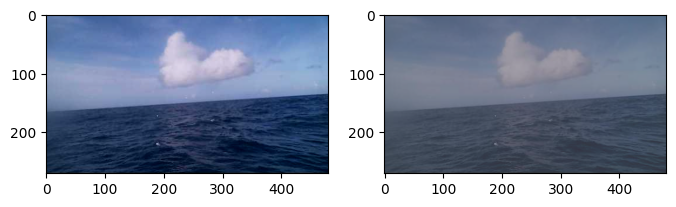

enhancement_type: contrast
enhance_factor: 4


In [114]:
# test enhancement_engine function with a panel
panel_path = '../images/panels/51101/2022_11_7_20_9'
#!panel_normalizer(panel_path)
enhancement_engine(panel_path + '/norm_panel_1.png',enhancement_type='contrast',enhance_factor=4,verbose=True)

type for contrast_value: <class 'int'>
 contrast_value: 102
type for benchmark_contrast: <class 'list'>
 benchmark_contrast: [126, 126]
type for image: <class 'PIL.PngImagePlugin.PngImageFile'>
 image: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=480x270 at 0x7FB991BADA90>


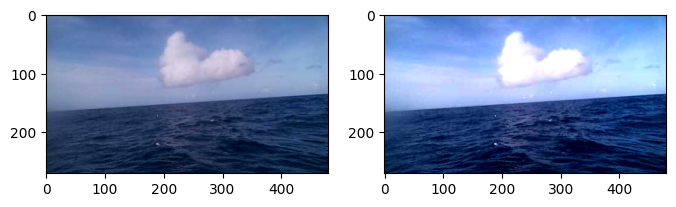

contrast_value: (102, 102)
contrast_factor: 1.2352941176470589
benchmark_contrast: 126
brightness: 0.4836891155478389
contrast_value: (102, 102)
contrast_factor: 1.2352941176470589
benchmark_contrast: 126
benchmark_brightness: 0.49032754026813224


In [136]:
make_like_benchmark(panel_path + '/norm_panel_1.png',benchmark_contrast, benchmark_brightness,verbose=True)

from PIL import Image, ImageFilter
#Read image
im = Image.open( 'image.jpg' )
#Display image
im.show()
 

from PIL import ImageEnhance
enh = ImageEnhance.Contrast(im)
enh.enhance(1.8).show("30% more contrast")

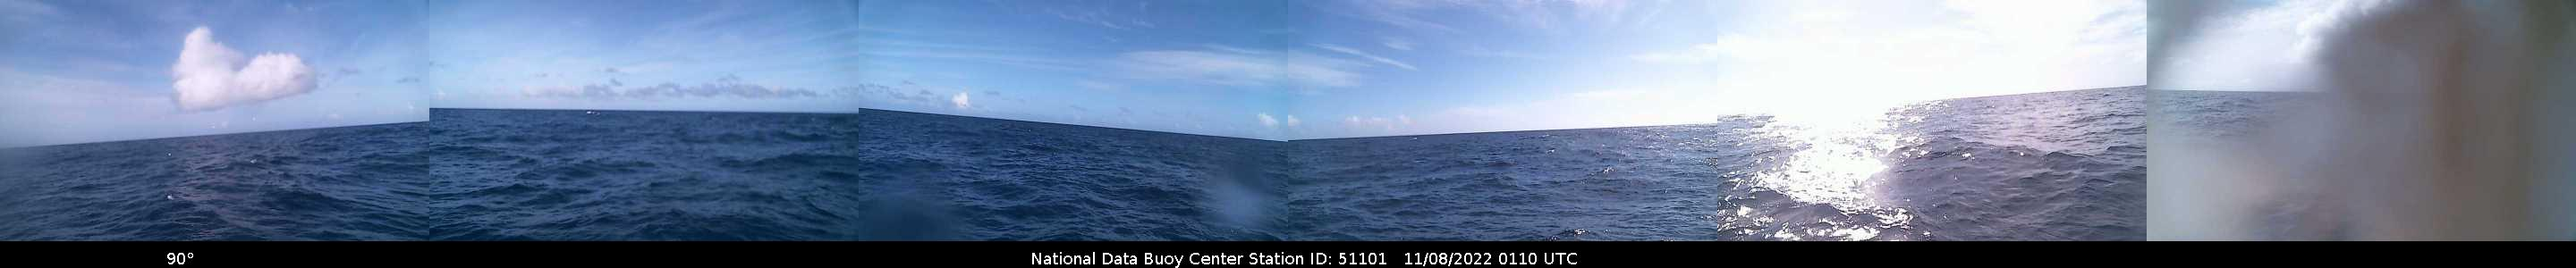

In [78]:
# let's test the panel normalizer function on images/panels/51101/2022_11_7_20_9/ that has images with different brightness values and see if the function normalizes the images to have the same brightness value
# first let's look at the exact image from the buoys folder that was used to create the panel
display(Image.open('../images/buoys/51101/2022_11_7_20_9.jpg'))

In [79]:
panel_folder_path = '../images/panels/51101/2022_11_7_20_9' # the path to the panel folder
panel_normalizer(panel_folder_path) # normalize the images in the panel folder


error in panel_normalizer only size-1 arrays can be converted to Python scalars


In [85]:
# using matplotlib to display the images in the panel folder
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import glob
import re

def display_panel(year,month,day,buoy):
    """
    display_panel takes a year, month, day and buoy and displays the panel for the day, month and year for the buoy.

    Parameters

    :param year: the year of the panel to be displayed
    :type year: int
    :param month: the month of the panel to be displayed
    :type month: int
    :param day: the day of the panel to be displayed
    :type day: int
    :param buoy: the buoy of the panel to be displayed
    :type buoy: int
    """
    # cast all the parameters to strings
    year = str(year)
    month = str(month)
    day = str(day)
    buoy = str(buoy)
    
    panel_folder_path = f'../images/panels/{buoy}/{year}_{month}_{day}' # the path to the panel folder (missing any random number at the end) Use glob to find the folder with the random number at the end
    panel_folder_path = glob.glob(panel_folder_path + '*')[0] # get the path to the panel folder with the random number at the end
    panel_folder_path = panel_folder_path + '/' # add a / to the end of the path
    # get the list of images in the panel folder
    images = os.listdir(panel_folder_path)
    # drop .DS_Store from the list
    images = [image for image in images if image != '.DS_Store']
    # sort the images in the panel folder
    images.sort()


    # step 1. get the list of images in the panel folder and do the following.
    # For each image in the panel folder, display the image, display the image as a column on a graph and display the set of images as a row on the graph. Annotations are added to the graph to show the brightness value of the image and the panel number. The graph is displayed after it is filled with all the images in the panel folder.
    # create a matplotlib figure that is made for a 3x2 grid of images that are 333 × 300 pixels in size. This is the size of the images in the panel folder
    fig = plt.figure(figsize=(6, 6)) # create a figure
    columns = 3 # set the number of columns
    rows = 2 # set the number of rows
    # go through the images in the panel folder
    for i in range(1, columns*rows +1):
        # get the image name
        image_name = images[i-1]
        # open the image
        image = Image.open(panel_folder_path + '/' + image_name)
        # convert the image to greyscale
        image = image.convert('L')
        # get the brightness value of the image
        brightness_value = calculate_brightness(image)
        # add the image to the graph
        fig.add_subplot(rows, columns, i)
        # display the image
        plt.imshow(image)
        # add the image name to the graph
        plt.title(image_name)
        # add the brightness value to the graph
        plt.text(0, 0, brightness_value, color='red')
        # add the panel number to the graph
        plt.text(0, 10, i, color='red')
    # display the graph
    plt.show()



error in panel_normalizer_contrast unhashable type: 'PngImageFile'


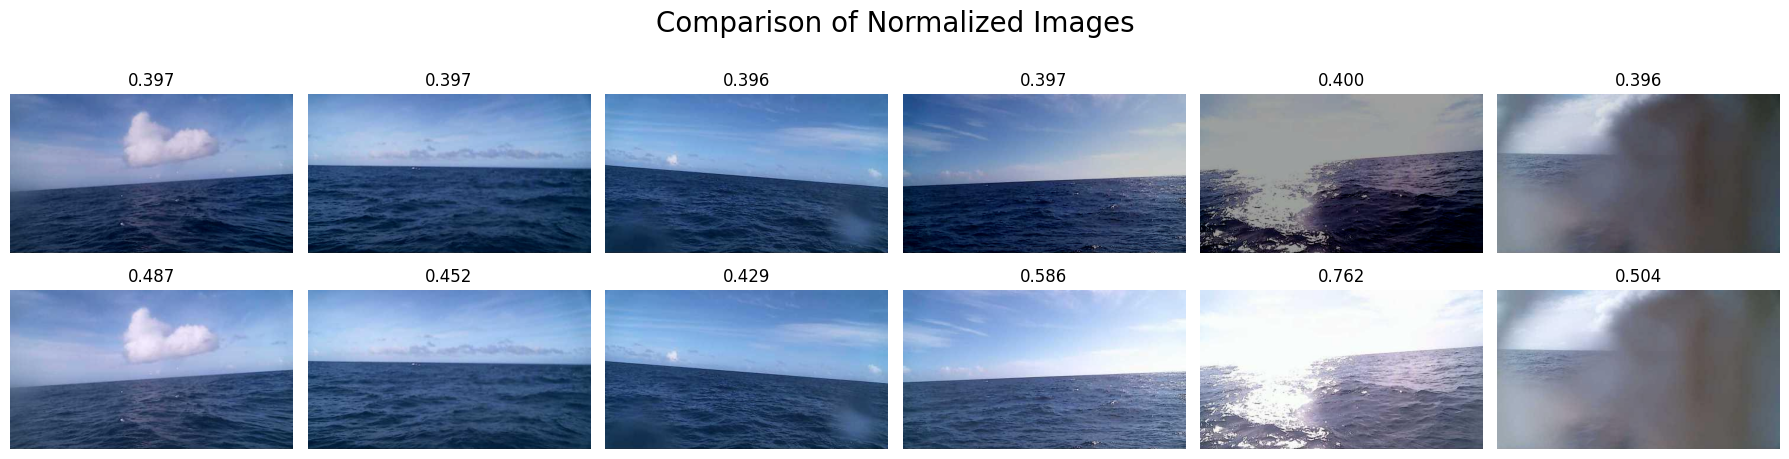

In [90]:
# step 2. Now, let's normalize the images in the panel folder and do the following.
# We want the contrast, and brightness of the image to be within 5% of the median brightness value of the images in the panel folder (which has 6 images). We want the brightness of the image to be within 5% of the median brightness value of the images in the panel folder. We want the contrast of the image to be within 5% of the median brightness value of the images in the panel folder. To make the images in the panel folder have the same brightness value, we will use the panel_normalizer function to normalize the images in the panel folder. We will then display the images in the panel folder as a row on the graph we made above. Annotations are added to the graph to show the brightness value of the image and the panel number. The graph is displayed after it is filled with all the images in the panel folder.
# normalize the images in the panel folder
panel_normalizer(panel_folder_path)
# create a matplotlib figure that is made for a 3x2 grid of images that are 333 × 300 pixels in size. This is the size of the images in the panel folder
fig = plt.figure(figsize=(18,5)) # create a figure
plt.font_size = 10 # set the font size
columns = 6 # set the number of columns
rows = 2 # set the number of rows
# go through the images in the panel folder
for i in range(1, columns*rows +1):
    # get the image name
    image_name = images[i-1]
    # open the image
    image = Image.open(panel_folder_path + '/' + image_name)
    # convert the image to greyscale
    # image = image.convert('L')
    # get the brightness value of the image
    brightness_value = calculate_brightness(image)
    # add the image to the graph
    fig.add_subplot(rows, columns, i)
    


    
    # display the image
    plt.imshow(image)
    # add brightness value to the graph as a title limited to 3 decimal places
    plt.title(f'{brightness_value:.3f}')
    # add the panel number to the graph
    plt.axis('off')
    plt.subplots_adjust(wspace=0.1, hspace=0)

plt.suptitle('Comparison of Normalized Images', fontsize=20)


# display the graph
plt.tight_layout()
plt.show()

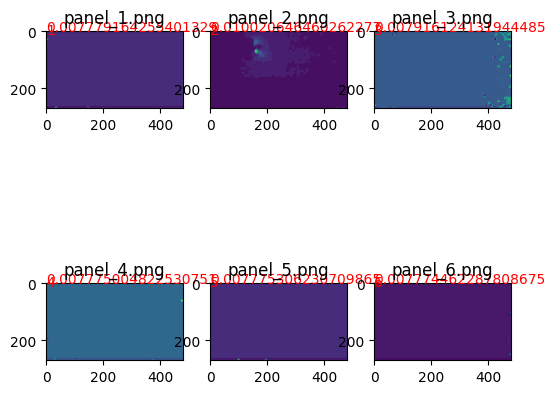

In [88]:
# display the panel for November 6, 2022 Buoy 51001
display_panel(2022,11,6,51001)
